<a href="https://colab.research.google.com/github/Fahmidanishi/CODES/blob/main/MLP_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt #for ploting

##Loading the dataset

In [ ]:
#keras e ei dataset already splited. 60k traning and 10k for testing
# it is 28 * 28 pixel image
(x_train,y_train),(x_test, y_test) = mnist.load_data() #dataset directly load

In [ ]:
x_train.shape,y_train.shape #no of image, 28 and 28 image dimension(row and column)
#training 60000

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape,y_test.shape
#testing 10000

((10000, 28, 28), (10000,))

## Dataset Details

In [ ]:
#koyta label ase ber korbo
#x feature y label
#y te unique function ta dile num of class ta pabo
unique, count = np.unique(y_train, return_counts=True) #0 class er image 5923 ....training # eta balanced dataset
print(unique,count)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [ ]:
unique, count = np.unique(y_test, return_counts=True) #0 class er image 980 ....testing
print(unique,count)

[0 1 2 3 4 5 6 7 8 9] [ 980 1135 1032 1010  982  892  958 1028  974 1009]


## Dataset samples

In [ ]:
index = [10,16,1888,2000,20005] # randomly liksi index gula # 5 ta image ekshate dekte chacchi
images = x_train[index]
labels = y_train[index]

## Ploting image samples

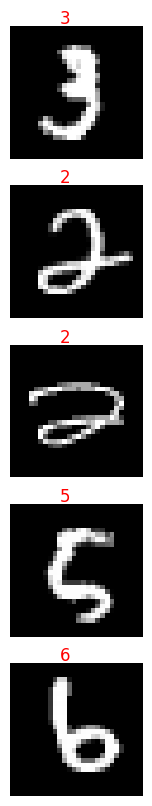

In [ ]:
plt.figure(figsize=(10,10)) #row size column size(inch)
for i in range(len(index)):
  plt.subplot(5,1,i+1)    #list 0 theke start tai i+1
  plt.imshow(images[i],cmap='gray') #cmap='gray' effect dekhar jonno
  plt.text(10,-1,labels[i],fontsize = 12,color="red")
  plt.axis('off')
plt.show()

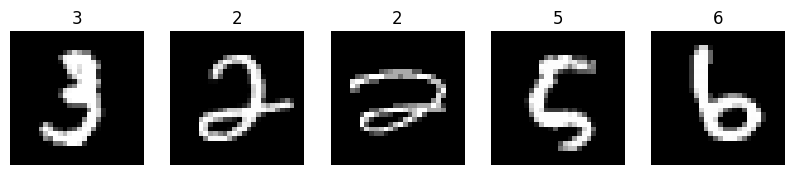

In [ ]:
plt.figure(figsize=(10,10)) #row size column size(inch)
for i in range(len(index)):
  plt.subplot(1,5,i+1)    #list 0 theke start tai i+1   # 5 1 na di 1 5 dile row akare deksi
  plt.imshow(images[i],cmap='gray') #cmap='gray' effect dekhar jonno
  plt.title(labels[i])
  plt.axis('off')
plt.show()

In [ ]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
#input hobe image er size er upor depend kore, for this one 28*28 = 784 hobe input layer e neuron and output e class num neurom = 10
input_size = x_train.shape[1]*x_train.shape[2]
print(input_size)


784


##convering to 1D

In [ ]:
x_train = np.reshape(x_train,[-1 , input_size]) #-1 diye 1D te convert kortesi
x_train.shape

(60000, 784)

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
x_test = np.reshape(x_test,[-1 , input_size]) #-1 diye 1D te convert kortesi
x_test.shape

(10000, 784)

## Normalization

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## One hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[:2] #entry te j class ta dibo oita 1 bakira 0

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim = input_size)) #neuron shoho layer ke dense layer bole
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) #loss or cost generate # training er split ke control korbo optimizer diye
model.fit(x_train,y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8958 - loss: 0.3489
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9725 - loss: 0.0864
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9835 - loss: 0.0538
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9870 - loss: 0.0393
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9893 - loss: 0.0314
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9910 - loss: 0.0264
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9930 - loss: 0.0204
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9949 - loss: 0.0157
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9944 - loss: 0.0165
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9962 - loss: 0.0133
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9949 - loss: 0.0163
Epoch 12/20
1875/1875 ━━━━━━━━

In [ ]:
loss,acc = model.evaluate(x_test,y_test) # loss and accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9772 - loss: 0.1420


In [ ]:
print(loss,acc)

0.11799895018339157 0.9804999828338623
